<class 'sklearn.linear_model._logistic.LogisticRegression'>
Confusion Matrix:
 [[ 21  38]
 [ 10 131]]

Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.36      0.47        59
           1       0.78      0.93      0.85       141

    accuracy                           0.76       200
   macro avg       0.73      0.64      0.66       200
weighted avg       0.75      0.76      0.73       200



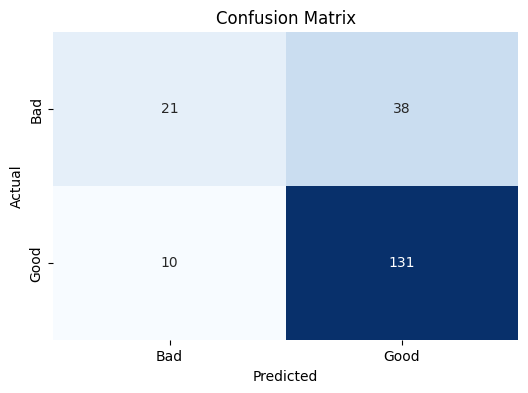

<class 'sklearn.svm._classes.SVC'>
Confusion Matrix:
 [[ 19  40]
 [  8 133]]

Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.32      0.44        59
           1       0.77      0.94      0.85       141

    accuracy                           0.76       200
   macro avg       0.74      0.63      0.64       200
weighted avg       0.75      0.76      0.73       200



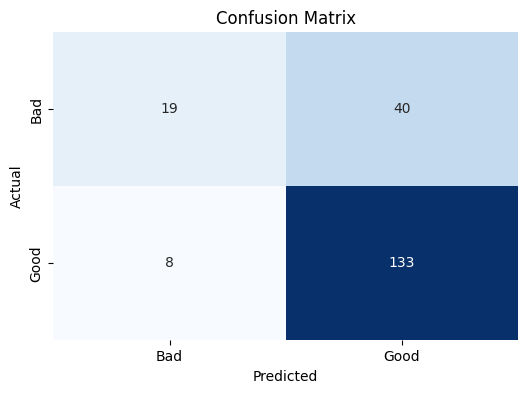

<class 'sklearn.naive_bayes.GaussianNB'>
Confusion Matrix:
 [[ 21  38]
 [ 19 122]]

Accuracy: 0.715

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.36      0.42        59
           1       0.76      0.87      0.81       141

    accuracy                           0.71       200
   macro avg       0.64      0.61      0.62       200
weighted avg       0.69      0.71      0.70       200



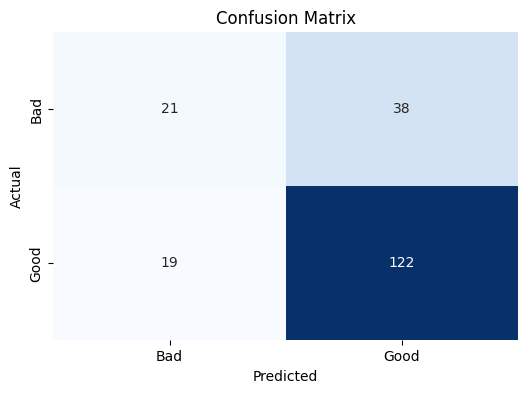

In [4]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import seaborn as sns

import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv('./german_credit_data.csv')

# Inspect the dataset

#print(df.head())

#print(df.info())

# Preprocessing

# Convert categorical variables using Label Encoding

label_encoder = LabelEncoder()

for column in df.columns:

    if df[column].dtype == 'object':

        df[column] = label_encoder.fit_transform(df[column])

# Splitting the data into features and target

X = df.drop('Risk', axis=1)  # 'credit_status' is assumed to be the target column

y = df['Risk']

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Feature scaling (standardization)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Model training and evaluation
a=[LogisticRegression,SVC,GaussianNB]

for i in a:
  model=i()
  print(i)
  model.fit(X_train, y_train)

  # Predictions

  y_pred = model.predict(X_test)

  # Evaluate the model

  cm = confusion_matrix(y_test, y_pred)

  accuracy = accuracy_score(y_test, y_pred)

  report = classification_report(y_test, y_pred)

  # Output results

  print("Confusion Matrix:\n", cm)

  print("\nAccuracy:", accuracy)

  print("\nClassification Report:\n", report)

  # Plot confusion matrix

  plt.figure(figsize=(6, 4))

  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])

  plt.xlabel("Predicted")

  plt.ylabel("Actual")

  plt.title("Confusion Matrix")

  plt.show()